In [341]:
import numpy as np
import scipy as sp
from PIL import Image as pil
from matplotlib import pyplot as plt
from glob import glob

Einlesen aller Fotos im Ordner

In [342]:
filelist = glob("*.jpg")

filelist = sorted(filelist)

filelist

['2018-06-07T03:06:41+02:00.jpg',
 '2018-06-07T03:21:41+02:00.jpg',
 '2018-06-07T03:36:42+02:00.jpg',
 '2018-06-07T03:51:42+02:00.jpg',
 '2018-06-11T08:12:24+02:00.jpg',
 '2018-06-11T08:27:25+02:00.jpg',
 '2018-06-11T08:42:25+02:00.jpg',
 '2018-06-11T08:57:26+02:00.jpg']

In [343]:
piclist = [np.asarray(pil.open(p), dtype=np.int16) for p in filelist]

pic0 = piclist[0]
pic1 = piclist[1]

In [383]:
threshold = 15
diff = np.abs(pic0 - pic1)
diff[np.sum(diff, axis=2) < threshold] = 0

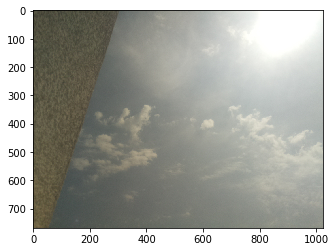

In [345]:
plt.imshow(pic0)

In [346]:
# plt.imshow(pic0[:,:,0], cmap=plt.get_cmap("Reds"))

In [347]:
# plt.imshow(pic0[:,:,1], cmap=plt.get_cmap("Greens"))

In [348]:
# plt.imshow(pic0[:,:,2], cmap=plt.get_cmap("Blues"))

Plotte das Foto und die Differenz zum naechsten Foto in jedem Farbkanal

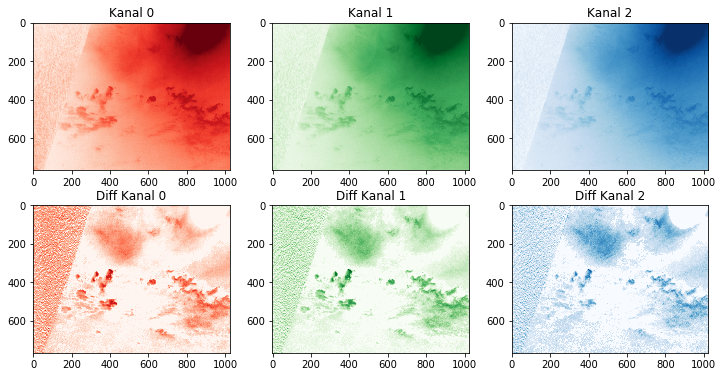

In [385]:
cmaps = [plt.get_cmap(cm) for cm in ["Reds", "Greens", "Blues"]]
cmap = plt.get_cmap("binary")
fig = plt.figure(figsize=(10, 15))
for i in range(3):
    ax = fig.add_subplot(int("63{}".format(i+1)))
    ax.imshow(pic0[:,:,i], cmap=cmaps[i])
    ax.set_title("Kanal {}".format(i))
    ax = fig.add_subplot(int("63{}".format(i+1+3)))
    ax.set_title("Diff Kanal {}".format(i))
    ax.imshow(diff[:,:,i], cmap=cmaps[i])
fig.tight_layout(pad=0.2)

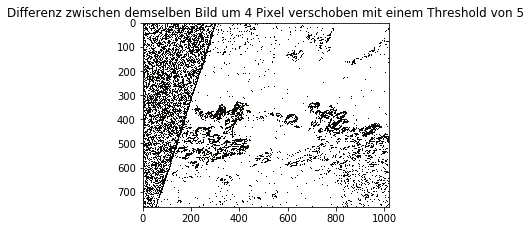

In [379]:
n, threshold = 4, 5

p = pic0[0:-n-1,0:-n-1,:]
p1 = pic0[n:-1,n:-1,:]

diff = np.abs(p1 - p)
diff[np.sum(diff, axis=2) < 3 * threshold] = 255

fig, ax = plt.subplots()
ax.imshow(diff)
# ax.imshow(np.fft.fft(diff).real)
ax.set_title("Differenz zwischen demselben Bild um {} Pixel verschoben mit einem Threshold von {}".format(n, threshold))
fig.tight_layout(pad=0.2)